In [2]:
import importlib
import ntuputils, trees
import numpy as np, os.path as osp, matplotlib.pyplot as plt, logging
ntuputils.logger.setLevel(logging.INFO)

In [3]:
@trees.clusterize_decorator
def merging_algo(node):
    trimmed_node = trees.trim_tree(node)
    for track in trees.traverse(node):
        # Tracks without a parent are the 'roots' of the decay tree
        if track.parent is None:
            track.merge = False
            continue

        dr = track.deltar(track.parent)
        if (
            dr > 0.1
            and (
                track.energy > 1.
                or (track.energy > 0.5 and track.energy / track.parent.energy > 0.3)
                )
            ):
            track.merge = False
        else:
            track.merge = True

   INFO:2020-12-02 13:36:05:ntuputils:161 Overwriting cache for <ntuputils.Dataset (1 root files) object at 0x17c3b0910>


   INFO:2020-12-02 13:36:06:ntuputils:171 Cached ~46.4 Mb (20 entries, 53 branches)
   INFO:2020-12-02 13:36:06:ntuputils:128 Using cache


   INFO:2020-12-02 13:36:07:trees:222 Adding <trees.Track 1 E=284.25 (-0.000,0.000,-0.000) pdgid=-211 at 0x17c3b08b0> as a root
   INFO:2020-12-02 13:36:07:trees:222 Adding <trees.Track 2 E=284.25 (-0.000,0.000,-0.000) pdgid=211 at 0x18295a400> as a root


(-67.79988259883528, 67.79988259883528)

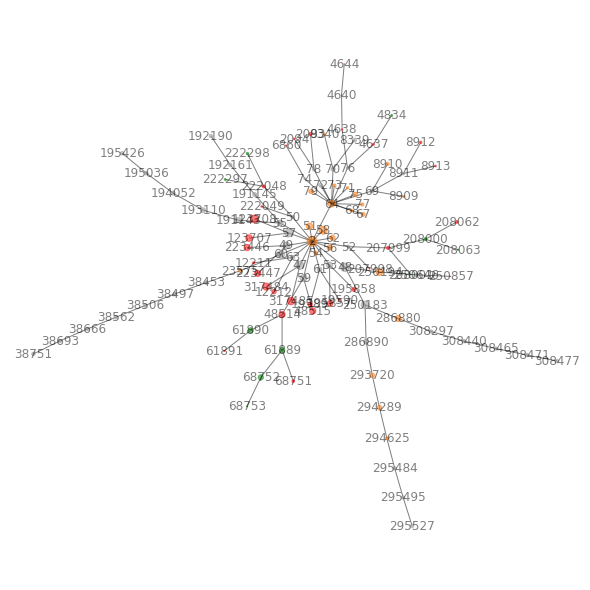

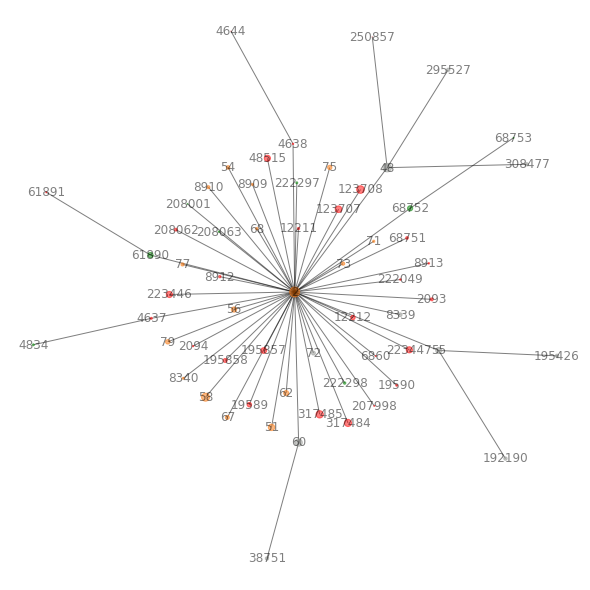

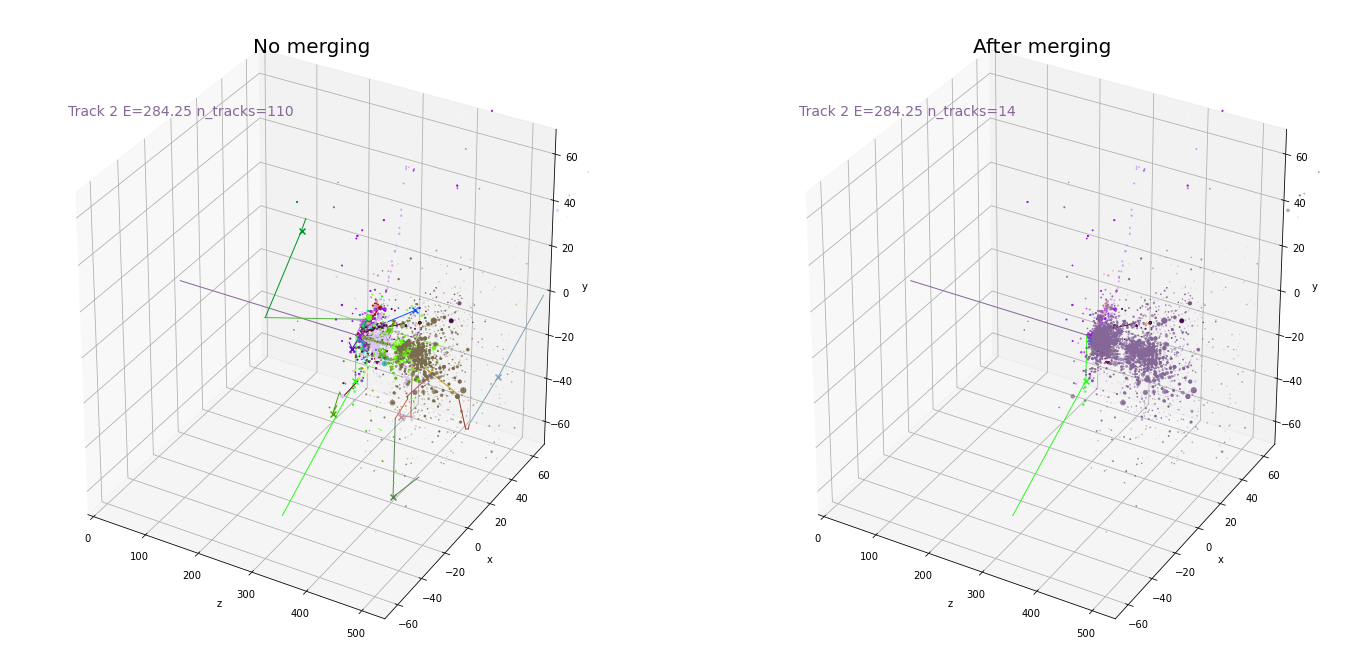

In [4]:
event = ntuputils.get_event('event1001_pdgid211_100GeV_Nov24_finecalo_numEvent20_numEvent20.root', i=1)
roots = trees.build_tree(event)
root = roots[1]

trimmed_root = trees.trim_tree(root)
root_cluster = merging_algo(trimmed_root)

trees.plot_graph(root, prog='neato', labels=False)
trees.plot_graph(trimmed_root, prog='neato', labels=False)

fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
trees.plot_node_rotated(root, labels=False, ax=ax1, color_by_pdgid=False, zmax=530)
trees.plot_node_rotated(root_cluster, labels=False, plot_clusters=True, ax=ax2, color_by_pdgid=False, zmax=530)

ax1.set_title('No merging', fontsize=20)
ax2.set_title('After merging', fontsize=20)

ax2.set_ylim(*ax1.get_ylim())
ax2.set_zlim(*ax1.get_zlim())